# Retraining Classifier
In the previous examples, the classifier was only trained in the first generation and a artificial decision function is used. Here, one example is given with a true decision function retrained in every time step.

In [1]:
import sys
import numpy as np
sys.path.append("../")

from fairensics.methods import AccurateDisparateImpact, DisparateMistreatment

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

from ltf.ltf_plot import LongTermFairnessPlot
from ltf.ltf_data.individual_data_generator import IndividualDataGenerator
from ltf.ltf_metric.aif360_metric import AifLongTermMetric
from ltf.ltf_clf.aif360_clf import AifLongTermCLF

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# The generator.
generator = IndividualDataGenerator(mean_pos=[0, 1],
                                    mean_neg=[12, 11],
                                    num_positive_label=100,
                                    num_negative_label=100,
                                    discrimination_factor=.9)

In [4]:
# The long term metric with default options (disparate impact and accuracy).
metric = AifLongTermMetric()

## 2. Constrained Example 

In [5]:
clf = AifLongTermCLF(AccurateDisparateImpact())
l = LongTermFairnessPlot(generator, clf, metric.metric, x_lim=[-3, 13], y_lim=[-1, 13], update_clf=True)

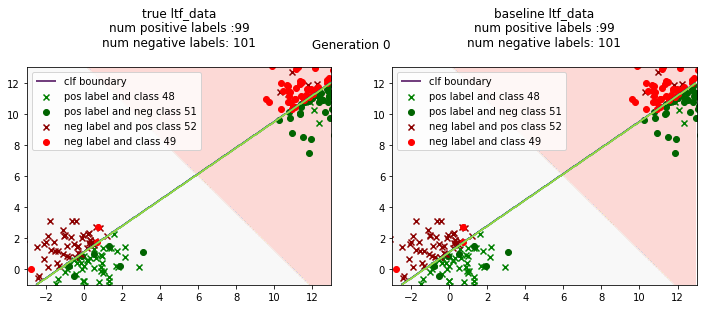

In [6]:
l.init_data()
l.plot_step()

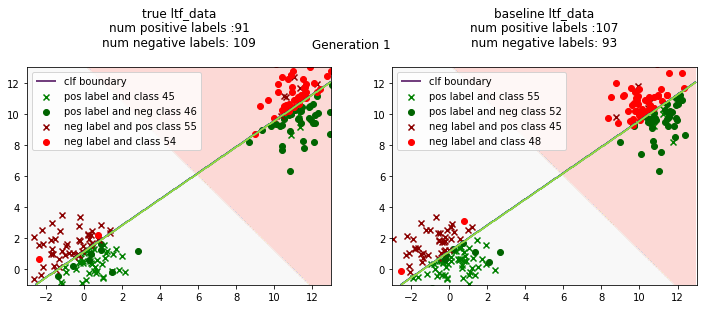

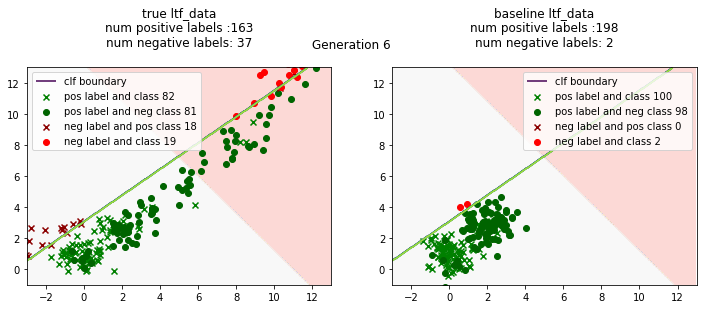

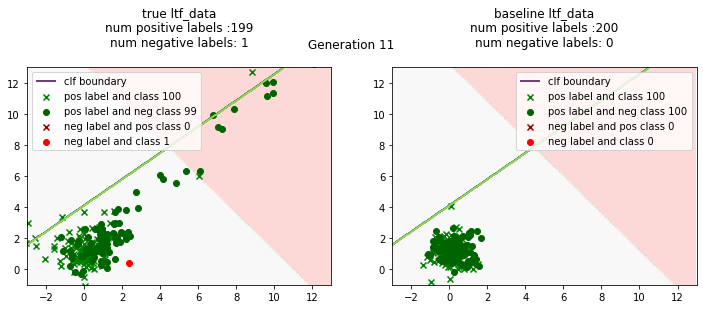

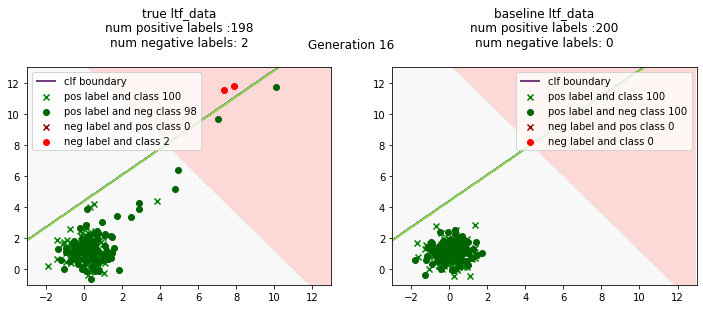

In [7]:
for i in range(20):
    l.run_step()
    l.run_baseline_step()
    if i % 5 == 0:
        l.plot_step()

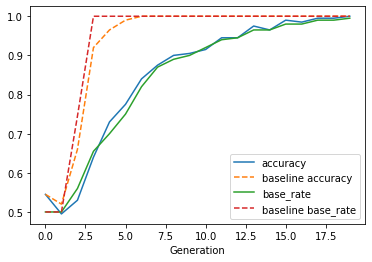

In [8]:
l.plot_ltf(metric._metrics)

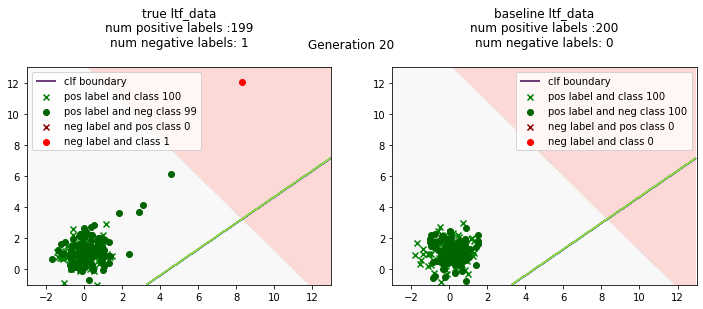

In [9]:
l.plot_step()